In [163]:
import pandas as pd
import numpy as np
df = pd.read_csv('교통사고현황.csv')
df

,발생일,발생시간,발생지_시도,발생지_시군구,법정동명,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,2017-01-01,0,서울,강북구,미아동,1,0,1,6,0
1,2017-01-01,0,서울,노원구,상계동,1,0,0,1,0
2,2017-01-01,0,서울,동작구,상도동,1,0,0,1,0
3,2017-01-01,0,서울,서초구,서초동,1,0,0,1,0
4,2017-01-01,0,서울,송파구,잠실동,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
114438,2019-12-31,22,서울,송파구,송파동,1,0,0,1,0
114439,2019-12-31,22,서울,영등포구,대림동,1,0,0,1,0
114440,2019-12-31,22,서울,중랑구,면목동,1,0,0,0,1
114441,2019-12-31,23,서울,강남구,수서동,1,0,0,1,0


In [164]:
df = pd.DataFrame(df)
df = df.groupby('발생일').sum().reset_index( level = '발생일' )
df

,발생일,발생시간,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,2017-01-01,734,73,2,25,90,10
1,2017-01-02,1118,82,4,27,92,17
2,2017-01-03,1148,88,1,25,80,13
3,2017-01-04,1409,115,1,39,99,25
4,2017-01-05,1269,103,1,34,111,8
...,...,...,...,...,...,...,...
1090,2019-12-27,1305,94,0,27,88,14
1091,2019-12-28,1150,94,0,27,105,10
1092,2019-12-29,1024,78,1,26,87,7
1093,2019-12-30,1281,91,1,19,93,53


In [165]:
df_17 = df[df['발생일'].str.contains('2017')]
df_17 = df_17.reset_index()
df_17

,index,발생일,발생시간,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,0,2017-01-01,734,73,2,25,90,10
1,1,2017-01-02,1118,82,4,27,92,17
2,2,2017-01-03,1148,88,1,25,80,13
3,3,2017-01-04,1409,115,1,39,99,25
4,4,2017-01-05,1269,103,1,34,111,8
...,...,...,...,...,...,...,...,...
360,360,2017-12-27,1228,94,4,28,86,12
361,361,2017-12-28,1197,91,1,28,81,12
362,362,2017-12-29,1611,119,1,38,114,15
363,363,2017-12-30,963,82,0,24,111,4


In [166]:
df_aci17 = pd.DataFrame({'date' : df_17['발생일'],
                      'count' : df_17['사고건수']})
df_aci17

,date,count
0,2017-01-01,73
1,2017-01-02,82
2,2017-01-03,88
3,2017-01-04,115
4,2017-01-05,103
...,...,...
360,2017-12-27,94
361,2017-12-28,91
362,2017-12-29,119
363,2017-12-30,82


---

---

In [167]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import copy

#response = requests.get('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=1&obs=9')
#html_doc = response.text

#soup = BeautifulSoup(html_doc, "html.parser")

In [168]:
date_list = list()
weather_list = list()

In [169]:
def get_address(adress):           #5주 있는 달 날씨정보
    response = requests.get(adress)
    html_doc = response.text

    soup = BeautifulSoup(html_doc, "html.parser")
    xa= ' \xa0 '
    for i in range(5):
        weak_day = soup.select_one('body > div.container > section > div > div.cont-wrap > div.cmp-past-obs > div:nth-child(3) > div > table > tbody > tr:nth-child(%d)'%((i+1)*2-1))
        day = weak_day.select('tr > td > span')

        weak_weather = soup.select_one('body > div.container > section > div > div.cont-wrap > div.cmp-past-obs > div:nth-child(3) > div > table > tbody > tr:nth-child(%d)'%((i+1)*2))
        weather = weak_weather.select('tr > td ')

        weather_jan = pd.DataFrame()

        for i in day:
            if i.text == '\xa0':
                continue
            else:
                date_list.append(i.text)

        for j in weather:
            if j.text == '\n\xa0\n':
                continue
            else:
                weather_day = re.sub('\n', ' ', j.text)
                weather_list.append(weather_day)
    

In [170]:
def get_address6(adress):           #6주 있는 달 날씨정보
    response = requests.get(adress)
    html_doc = response.text

    soup = BeautifulSoup(html_doc, "html.parser")
    xa= ' \xa0 '
    for i in range(6):
        weak_day = soup.select_one('body > div.container > section > div > div.cont-wrap > div.cmp-past-obs > div:nth-child(3) > div > table > tbody > tr:nth-child(%d)'%((i+1)*2-1))
        day = weak_day.select('tr > td > span')

        weak_weather = soup.select_one('body > div.container > section > div > div.cont-wrap > div.cmp-past-obs > div:nth-child(3) > div > table > tbody > tr:nth-child(%d)'%((i+1)*2))
        weather = weak_weather.select('tr > td ')

        weather_jan = pd.DataFrame()

        for i in day:
            if i.text == '\xa0':
                continue
            else:
                date_list.append(i.text)

        for j in weather:
            if j.text == '\n\xa0\n':
                continue
            else:
                weather_day = re.sub('\n', ' ', j.text)
                weather_list.append(weather_day)
    

In [171]:
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=1&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=2&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=3&obs=9')
get_address6('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=4&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=5&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=6&obs=9')
get_address6('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=7&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=8&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=9&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=10&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=11&obs=9')
get_address6('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=12&obs=9')

print(date_list)
print(weather_list)

['1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '30일', '31일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '30일', '31일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '30일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '

In [172]:
#날씨정보 crawling
df_wea17 = pd.DataFrame({'date2' : date_list,
                         'weather' : weather_list})

df_wea17

,date2,weather
0,1일,박무 연무
1,2일,비 박무 연무
2,3일,박무 연무
3,4일,박무 연무
4,5일,
...,...,...
360,27일,
361,28일,눈 연무
362,29일,눈 박무 연무
363,30일,비 눈 진눈깨비 안개 박무 연무


In [173]:
#day2 삭제 전 df
df_plus17 = pd.concat([df_aci, df_wea], axis = 1)
df_plus17

,date,count,date2,weather
0,2017-01-01,73,1일,박무 연무
1,2017-01-02,82,2일,비 박무 연무
2,2017-01-03,88,3일,박무 연무
3,2017-01-04,115,4일,박무 연무
4,2017-01-05,103,5일,
...,...,...,...,...
360,2017-12-27,94,27일,
361,2017-12-28,91,28일,눈 연무
362,2017-12-29,119,29일,눈 박무 연무
363,2017-12-30,82,30일,비 눈 진눈깨비 안개 박무 연무


In [174]:
df_dropdate17 = df_plus17.drop(['date2'], axis = 1)
df17 = copy.deepcopy(df_dropdate17)

In [175]:
day_list = list()
day = 0
for i in range(365):
    if day%7 == 0:
        day_list.append('일요일')
    elif day%7 == 1:
        day_list.append('월요일')
    elif day%7 == 2:
        day_list.append('화요일')
    elif day%7 == 3:
        day_list.append('수요일')
    elif day%7 == 4:
        day_list.append('목요일')
    elif day%7 == 5:
        day_list.append('금요일')
    elif day%7 == 6:
        day_list.append('토요일')
    day += 1
    
#day_list
len(day_list)

365

In [179]:
#day 열 생성 ( 요일데이터 ) 
df17['day'] = day_list
df17

,date,count,weather,day
0,2017-01-01,73,박무 연무,일요일
1,2017-01-02,82,비 박무 연무,월요일
2,2017-01-03,88,박무 연무,화요일
3,2017-01-04,115,박무 연무,수요일
4,2017-01-05,103,,목요일
...,...,...,...,...
360,2017-12-27,94,,수요일
361,2017-12-28,91,눈 연무,목요일
362,2017-12-29,119,눈 박무 연무,금요일
363,2017-12-30,82,비 눈 진눈깨비 안개 박무 연무,토요일


In [194]:
mon17 = df17[df17.day.str.contains('월')]['count'].sum()
tue17 = df17[df17.day.str.contains('화')]['count'].sum()
wed17 = df17[df17.day.str.contains('수')]['count'].sum()
thu17 = df17[df17.day.str.contains('목')]['count'].sum()
fri17 = df17[df17.day.str.contains('금')]['count'].sum()
sat17 = df17[df17.day.str.contains('토')]['count'].sum()
sun17 = df17[df17.day.str.contains('일요')]['count'].sum()

print(mon, tue, wed, thu, fri, sat, sun)

5374 5340 5798 5563 6030 6050 4470


In [183]:
# 비온날의 총 합
# 100
rainday17 = df17[df17.weather.str.contains('비')]

rainday17 = rainday17.reset_index()

tot_rainday17 = 108 - 8 #비눈같이온날 마이너스
rainday17 = rainday17.drop(['index'], axis = 1)
rainday17

,date,count,weather,day
0,2017-01-02,82,비 박무 연무,월요일
1,2017-01-08,72,비 박무 연무,일요일
2,2017-01-09,95,비 박무 연무,월요일
3,2017-01-26,147,비 박무 연무,목요일
4,2017-01-27,69,비 박무 황사,금요일
...,...,...,...,...
117,2017-12-04,108,비 박무 연무,월요일
118,2017-12-06,132,눈 진눈깨비 박무,수요일
119,2017-12-10,70,비 눈 진눈깨비 박무 연무,일요일
120,2017-12-24,68,비 안개 박무 연무,일요일


In [184]:
#비, 눈 같이온날 8일
rainsnowday17 = rainday17[rainday17.weather.str.contains('눈')]
rainsnowday17 = rainsnowday17.reset_index()
tot_rainsnowday17 = 8
rainsnowday17

,index,date,count,weather,day
0,5,2017-01-29,53,눈 진눈깨비 박무,일요일
1,6,2017-02-05,76,비 눈 진눈깨비 박무 연무,일요일
2,9,2017-02-19,85,비 눈 박무,일요일
3,11,2017-02-22,91,비 눈 진눈깨비 박무,수요일
4,111,2017-11-17,128,비 눈 진눈깨비 연무,금요일
5,113,2017-11-25,152,비 소나기 눈 진눈깨비 박무,토요일
6,118,2017-12-06,132,눈 진눈깨비 박무,수요일
7,119,2017-12-10,70,비 눈 진눈깨비 박무 연무,일요일
8,121,2017-12-30,82,비 눈 진눈깨비 안개 박무 연무,토요일


In [185]:
#비눈같이온날 사고의 합
tot_rainsnowaci17 = rainsnowday17['count'].sum()
tot_rainsnowaci17

869

In [186]:
#비온날 사고의 총 합
tot_rainaci17 = df17[df17.weather.str.contains('비')]['count'].sum()
tot_rainaci17 = tot_rainaci17 - tot_rainsnowaci17
tot_rainaci17

11745

In [187]:
#눈온날의 총 합
snowday17 = df17[df17.weather.str.contains('눈')]

snowday17 = snowday17.reset_index()

tot_snowday17 = 23 - 8 #비눈 같이온날 마이너스
snowday17 = snowday17.drop(['index'], axis = 1)
snowday17

,date,count,weather,day
0,2017-01-12,113,눈,목요일
1,2017-01-13,117,눈,금요일
2,2017-01-18,118,눈 연무,수요일
3,2017-01-20,75,눈 박무 연무,금요일
4,2017-01-21,105,눈 박무 연무,토요일
5,2017-01-22,83,눈 연무,일요일
6,2017-01-29,53,눈 진눈깨비 박무,일요일
7,2017-01-30,67,눈 박무,월요일
8,2017-02-05,76,비 눈 진눈깨비 박무 연무,일요일
9,2017-02-19,85,비 눈 박무,일요일


In [188]:
#눈온날 사고의 총 합
tot_snowaci17 = df17[df17.weather.str.contains('눈')]['count'].sum()
tot_snowaci17 = tot_snowaci17 - tot_rainsnowaci17
tot_snowaci17

2031

In [189]:
tot_normalday17 = 365 - tot_rainday17 - tot_snowday17 - tot_rainsnowday17
tot_normalday17

242

In [190]:
tot_aci17 = df17['count'].sum()
print(tot_aci17)

tot_normalaci17 = tot_aci17 - tot_rainaci17 - tot_snowaci17 - tot_rainsnowaci17
print(tot_normalaci17)

38625
23980


In [191]:
avg_normal17 = tot_normalaci17 / tot_normalday17
avg_rain17 = tot_rainaci17 / tot_rainday17
avg_snow17 = tot_snowaci17 / tot_snowday17
avg_rainsnow17 = tot_rainsnowaci17 / tot_rainsnowday17

print(avg_normal17)
print(avg_rain17)
print(avg_snow17)
print(avg_rainsnow17)

99.0909090909091
117.45
135.4
108.625


In [141]:
from matplotlib import font_manager, rc
font_path = "../data/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<function matplotlib.pyplot.show(close=None, block=None)>

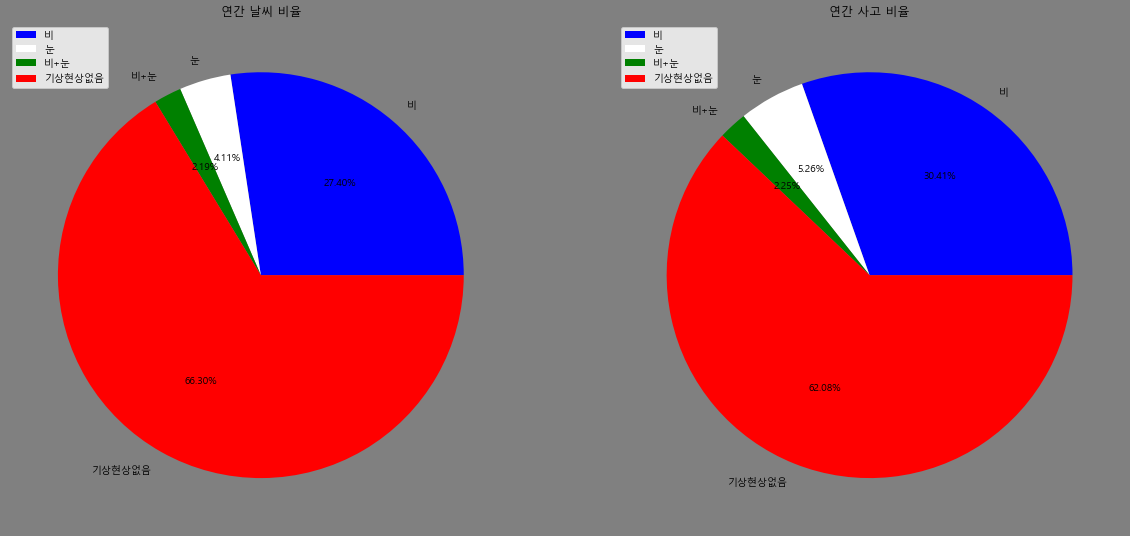

In [192]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (20, 20), facecolor = 'grey')
#pie 차트
plt.subplot(1, 2, 1)
plt.pie([tot_rainday17, tot_snowday17, tot_rainsnowday17, tot_normalday17], labels = ['비', '눈', '비+눈', '기상현상없음'], colors = ['blue', 'white', 'green', 'red'], autopct = '%.2f%%')
plt.title('연간 날씨 비율')
plt.legend()
plt.show

plt.subplot(1, 2, 2)
#plt.figure(figsize = (10, 10), facecolor = 'grey')
plt.pie([tot_rainaci17, tot_snowaci17, tot_rainsnowaci17, tot_normalaci17], labels = ['비', '눈', '비+눈', '기상현상없음'], colors = ['blue', 'white', 'green', 'red'], autopct = '%.2f%%')
plt.title('연간 사고 비율')
plt.legend()
plt.show

<BarContainer object of 4 artists>

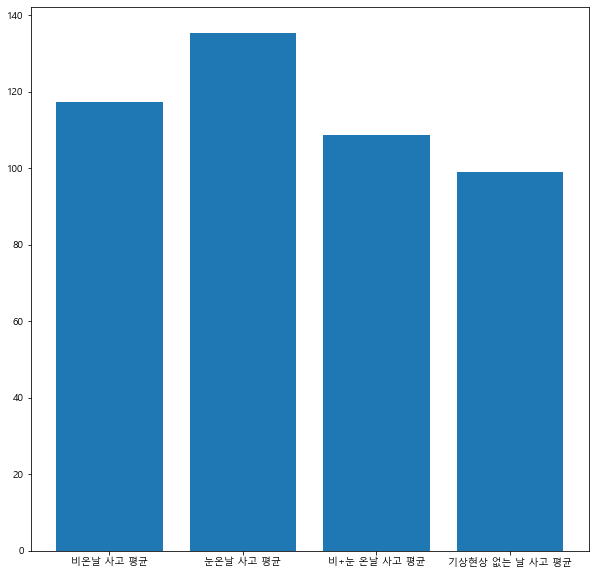

In [193]:
#날씨별 평균 사고량
plt.figure(figsize = (10, 10))
plt.bar(['비온날 사고 평균', '눈온날 사고 평균', '비+눈 온날 사고 평균', '기상현상 없는 날 사고 평균'], [avg_rain17, avg_snow17, avg_rainsnow17, avg_normal17])

<BarContainer object of 7 artists>

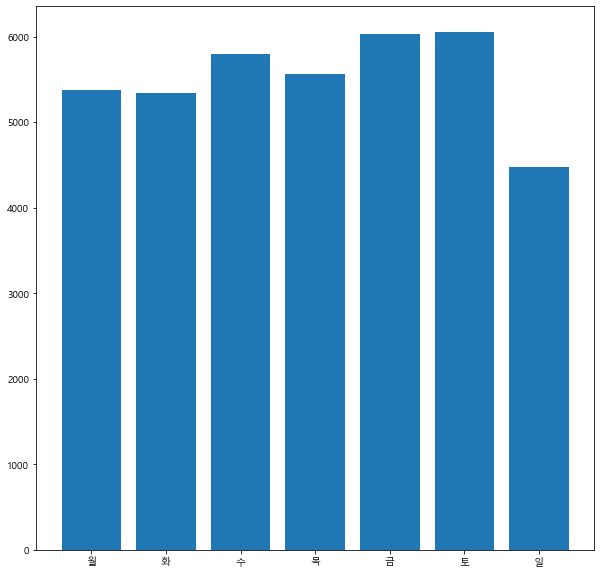

In [195]:
#요일별 평균 사고량
plt.figure(figsize = (10, 10))
plt.bar(['월', '화', '수', '목', '금', '토', '일'], [mon17, tue17, wed17, thu17, fri17, sat17 ,sun17])

1. 서울에서는 날씨와 사고량은 연관성이 없는 것 같다.
2. 월~목요일 보다 금.토요일의 사고량이 비교적 높은 편이고, 일요일의 사고량은 낮은 편이다.